In [49]:
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import datetime as dt
from config import gkey
from geopy import geocoders
gmaps.configure(api_key=gkey)

In [50]:
file="Resources/attacks.csv"
pd.set_option('display.max_columns', None)
df = pd.read_csv(file,encoding = 'cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Read in Shark Attack CSV file

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Review data information and prepare to drop the columns we will not be using in the EDA.

In [52]:
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [53]:
df2 = df.drop(['Name',  'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], axis=1)
df2. head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


Get the column names and then drop the columns that we will not be using in the EDA.

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  8702 non-null   object 
 1   Date         6302 non-null   object 
 2   Year         6300 non-null   float64
 3   Type         6298 non-null   object 
 4   Country      6252 non-null   object 
 5   Area         5847 non-null   object 
 6   Location     5762 non-null   object 
 7   Activity     5758 non-null   object 
 8   Sex          5737 non-null   object 
 9   Age          3471 non-null   object 
 10  Injury       6274 non-null   object 
 11  Fatal (Y/N)  5763 non-null   object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


In [55]:
df2 = df2.rename(columns={"Case Number": "case_number", 
                        "Date": "date", 
                        "Year": "year", 
                        "Type": "type", 
                        "Country": "country", 
                        "Area": "area",
                        "Location": "location",
                        "Activity": "activity",
                        "Sex ": "gender",
                        "Age": "age",
                        "Injury": "injury",
                        "Fatal (Y/N)": "fatal",})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  8702 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   gender       5737 non-null   object 
 9   age          3471 non-null   object 
 10  injury       6274 non-null   object 
 11  fatal        5763 non-null   object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


In [56]:
df2.drop_duplicates(subset="case_number", inplace=True)

Remove duplicate case numbers/incident reports

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6288 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  6287 non-null   object 
 1   date         6286 non-null   object 
 2   year         6284 non-null   float64
 3   type         6282 non-null   object 
 4   country      6236 non-null   object 
 5   area         5832 non-null   object 
 6   location     5746 non-null   object 
 7   activity     5744 non-null   object 
 8   gender       5722 non-null   object 
 9   age          3465 non-null   object 
 10  injury       6258 non-null   object 
 11  fatal        5751 non-null   object 
dtypes: float64(1), object(11)
memory usage: 638.6+ KB


In [58]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df2.to_csv('out.zip', index=False,
          compression=compression_opts)  

Print to CSV file to check that data cleaning was correct.

In [59]:
df2 = df2[(df2['year'] >= 2000)]

Filter out the years we are not including in the analysis. 

Summary:
1. We read in our CSV file
2. We reviewed the data types and column row counts
3. We dropped the irrelvant columns to our analysis
4. We removed the duplicates in case numbers/incident reports
5. Printed data to CSV file to double check the work
6. We filtered out years prior to 2000

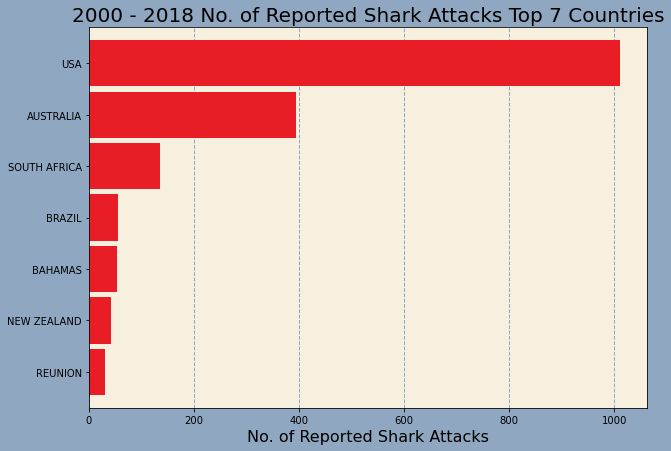

In [60]:

plt.figure(facecolor="#8fa7c0",figsize =(10, 7))
ax = plt.axes()
ax.set_facecolor("#f7f0de")
df2['country'].value_counts().head(7).sort_values(ascending=True).plot(kind='barh',color="#e91d25",width =.9)


plt.xlabel("No. of Reported Shark Attacks", fontsize=16)
#plt.xticks(rotation=0)
plt.title("2000 - 2018 No. of Reported Shark Attacks Top 7 Countries", fontsize=20)
ax.set_axisbelow(True)
ax.grid(axis='x',linestyle='dashed',color='#8fa7c0',linewidth=1)

plt.show()

Graphed shows the number of reported shark attacks for the top 7 countries from 2000 - 2018. Many countries in the world either do not report their shark attacks or just have signicantly less exposure to the situation.

In [61]:
import plotly.express as px
sharkb = df2.groupby(['country'],as_index=False).size()
sharkb = sharkb.sort_values(by=['size'], ascending=False)
px.choropleth(sharkb, 
              locations = 'country',
              color="size", 
              color_continuous_scale="Turbo",
              locationmode='country names',
              scope="world",
              range_color=(0, 1200),
              title='No. of Reported Shark Attacks by Country 2000-2018',
              height=400
             )


Map of world attacks from 2000 - 2018

In [62]:
df_us = df2[(df2['country'] == 'USA')]
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  1011 non-null   object 
 1   date         1011 non-null   object 
 2   year         1011 non-null   float64
 3   type         1011 non-null   object 
 4   country      1011 non-null   object 
 5   area         1011 non-null   object 
 6   location     1005 non-null   object 
 7   activity     963 non-null    object 
 8   gender       985 non-null    object 
 9   age          813 non-null    object 
 10  injury       1011 non-null   object 
 11  fatal        949 non-null    object 
dtypes: float64(1), object(11)
memory usage: 102.7+ KB


Now I am narrowing the data to only the USA. From here I can see that I now have 1,011 reported cases from 2000-2018, and my date is in the wrong format and will need to cleaned and casted to datetime. 

In [63]:
df_us.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N


In [64]:
df_us_2 = df_us.replace('Reported','', regex=True)
df_us_3 = df_us_2.replace('--','-', regex=True)
df_us_3['date'] = df_us_3['date'].str.strip()
df_us_3.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N


To clean the data, I first used the string replace function. 
This allowed me to remove the common text or symbols that would put the entry back to a convertable date. 
Then, I used string strip to remove the leading and trailing white spaces. 

In [65]:
df_us_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  1011 non-null   object 
 1   date         1011 non-null   object 
 2   year         1011 non-null   float64
 3   type         1011 non-null   object 
 4   country      1011 non-null   object 
 5   area         1011 non-null   object 
 6   location     1005 non-null   object 
 7   activity     963 non-null    object 
 8   gender       985 non-null    object 
 9   age          813 non-null    object 
 10  injury       1011 non-null   object 
 11  fatal        949 non-null    object 
dtypes: float64(1), object(11)
memory usage: 102.7+ KB


Looking at the data after the cleaning, no rows lost. Looks good from here.

In [66]:
# uncomment to get the output csv to review

# compression_opts = dict(method='zip',
#                         archive_name='other.csv')  
# df_us_3.to_csv('out.zip', index=False,
#           compression=compression_opts)  

To double check my work, I printed to CSV file to review and confirm I can able to do what I wanted. I was able to see the dates that would never format due to not have a month and day.

In [67]:
df_us_3['date']= pd.to_datetime(df_us_3['date'],errors='coerce')
df_us_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  1011 non-null   object        
 1   date         1009 non-null   datetime64[ns]
 2   year         1011 non-null   float64       
 3   type         1011 non-null   object        
 4   country      1011 non-null   object        
 5   area         1011 non-null   object        
 6   location     1005 non-null   object        
 7   activity     963 non-null    object        
 8   gender       985 non-null    object        
 9   age          813 non-null    object        
 10  injury       1011 non-null   object        
 11  fatal        949 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 102.7+ KB


Now that the data in the date column was as clean as I wanted, I casted it to datetime and used errors='coerce' to make all the rows that did not comply a null. We lost 2 rows of data as was expected. 

In [68]:
file="Resources/statelatlong.csv"
pd.set_option('display.max_columns', None)
df_states = pd.read_csv(file,encoding = 'cp1252')
df_states.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [69]:
df_states.rename(columns={"State":"state",
                          "Latitude":"latitude",
                          "Longitude":"longitude",
                          "City":"area"}, inplace=True)
df_states.head()

,state,latitude,longitude,area
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [70]:
df_usa = pd.merge(df_us_3, df_states, how="left", on="area")
df_usa.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal,state,latitude,longitude
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,CA,37.271875,-119.270415
1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,GA,32.678125,-83.222976
2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,HI,20.460000,-157.505000
3,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,FL,27.975728,-83.833017
4,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,FL,27.975728,-83.833017


Using Kaggle dataset for State Latitude and Logitude information, I merged the data with the USA dataframe. This will allow us to plot the data on a map.

In [71]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  1011 non-null   object        
 1   date         1009 non-null   datetime64[ns]
 2   year         1011 non-null   float64       
 3   type         1011 non-null   object        
 4   country      1011 non-null   object        
 5   area         1011 non-null   object        
 6   location     1005 non-null   object        
 7   activity     963 non-null    object        
 8   gender       985 non-null    object        
 9   age          813 non-null    object        
 10  injury       1011 non-null   object        
 11  fatal        949 non-null    object        
 12  state        1002 non-null   object        
 13  latitude     1002 non-null   float64       
 14  longitude    1002 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(11)
memory usa

In [72]:
pd.to_numeric(df_usa.age,errors='coerce')

0       57.0
1       11.0
2       48.0
3       52.0
4       15.0
        ... 
1006    14.0
1007    37.0
1008    39.0
1009    27.0
1010     NaN
Name: age, Length: 1011, dtype: float64

In [73]:
df_usa["age_clean"]=pd.to_numeric(df_usa.age,errors='coerce')
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  1011 non-null   object        
 1   date         1009 non-null   datetime64[ns]
 2   year         1011 non-null   float64       
 3   type         1011 non-null   object        
 4   country      1011 non-null   object        
 5   area         1011 non-null   object        
 6   location     1005 non-null   object        
 7   activity     963 non-null    object        
 8   gender       985 non-null    object        
 9   age          813 non-null    object        
 10  injury       1011 non-null   object        
 11  fatal        949 non-null    object        
 12  state        1002 non-null   object        
 13  latitude     1002 non-null   float64       
 14  longitude    1002 non-null   float64       
 15  age_clean    790 non-null    float64       
dtypes: dat

In [74]:
df_usa.age_clean.describe()

count    790.000000
mean      28.327848
std       16.040826
min        3.000000
25%       16.000000
50%       24.000000
75%       40.000000
max       86.000000
Name: age_clean, dtype: float64

In [75]:
df_usa.groupby("gender").age_clean.mean()

gender
F      26.574586
M      28.872517
M      42.000000
lli    38.000000
Name: age_clean, dtype: float64

In [76]:
df_usa.groupby("fatal").age_clean.mean()

fatal
N          27.957534
UNKNOWN          NaN
Y          41.277778
Name: age_clean, dtype: float64

In [77]:
df_usa.injury.value_counts()

Foot bitten                                   30
Left foot bitten                              27
Right foot bitten                             18
No injury                                     13
FATAL                                         12
                                              ..
Puncture wounds to hand                        1
Puncture wounds to calf and hand               1
Puncture wound to left ankle                   1
Lacerations to leg                             1
No injury to occupant; shark bit propeller     1
Name: injury, Length: 702, dtype: int64

In [78]:
df_usa.injury.value_counts()[50:70]

Right leg bitten                                    2
Ankle lacerated                                     2
No injury, paddleboard bitten                       2
Minor lacerations to right foot                     2
Lacerations to left forearm                         2
Laceration to toe                                   2
Left calf lacerated                                 2
Lacerations to arm                                  2
Laceration to thigh                                 2
Cuts on right foot                                  2
Minor injury to ankle                               2
Leg injured                                         2
Lacerations to right lower leg                      2
No injury. Hull bitten, tooth fragment recovered    2
Thigh bitten                                        2
Lacerations to buttocks & thigh                     2
Minor injuries to foot                              2
Laceration to forearm                               2
No injury, shark bumped surf

For the Injury type - Parent Categories:

bitten/bite(bit)

lacerations/lacerated(lacerat)

no injury

fatal

puncture

minor injury/injured(injur)

other


In [79]:
df_usa["parent_injury"] = None

mask = df_usa.injury.str.lower().str.contains("lacerat")
df_usa.loc[mask,"parent_injury"]= "Laceration"


mask = df_usa.injury.str.lower().str.contains("cut")
df_usa.loc[mask,"parent_injury"]= "Laceration"


mask = df_usa.injury.str.lower().str.contains("gash")
df_usa.loc[mask,"parent_injury"]= "Laceration"


mask = df_usa.injury.str.lower().str.contains("fatal")
df_usa.loc[mask,"parent_injury"]= "Severe Injury"


mask = df_usa.injury.str.lower().str.contains("bit")
df_usa.loc[mask,"parent_injury"]= "Bite"


mask = df_usa.injury.str.lower().str.contains("nip")
df_usa.loc[mask,"parent_injury"]= "Bite"


mask = df_usa.injury.str.lower().str.contains("puncture")
df_usa.loc[mask,"parent_injury"]= "Puncture"


mask = df_usa.injury.str.lower().str.contains("injur")
df_usa.loc[mask,"parent_injury"]= "Minor Injury"


mask = df_usa.injury.str.lower().str.contains("abrasion")
df_usa.loc[mask,"parent_injury"]= "Minor Injury"


mask = df_usa.injury.str.lower().str.contains("no injury")
df_usa.loc[mask,"parent_injury"]= "No Injury"


mask = df_usa.injury.str.lower().str.contains("major")
df_usa.loc[mask,"parent_injury"]= "Severe Injury"


mask = df_usa.injury.str.lower().str.contains("severe")
df_usa.loc[mask,"parent_injury"]= "Severe Injury"


df_usa.loc[pd.isnull(df_usa.parent_injury), "parent_injury"] = "Other"

df_usa.parent_injury.value_counts()


Laceration       351
Bite             231
No Injury        131
Minor Injury     124
Puncture          96
Severe Injury     47
Other             31
Name: parent_injury, dtype: int64

In [80]:
df_usa.loc[df_usa.parent_injury == "Other"]

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal,state,latitude,longitude,age_clean,parent_injury
82,2016.10.10,2016-10-10,2016.0,Unprovoked,USA,Oregon,"Indian Beach, Ecola State Park, Clatsop County",Surfing,M,29,Wounds to upper thigh and lower leg,N,OR,44.141905,-120.538099,29.0,Other
97,2016.08.06,2016-08-06,2016.0,Unprovoked,USA,Hawaii,Maui,SUP Foil boarding,M,21,"No inury, shark & board collided",N,HI,20.460000,-157.505000,21.0,Other
124,2016.05.15,2016-05-15,2016.0,Provoked,USA,Florida,"Boca Raton, Palm Beach County",Teasing a shark,F,23,Arm grabbed PROVOKED INCIDENT,N,FL,27.975728,-83.833017,23.0,Other
171,2015.08.22.b,2015-08-22,2015.0,Invalid,USA,Florida,"Cocoa Beach, Brevard County",NaN,M,NaN,Wound to right lower leg,NaN,FL,27.975728,-83.833017,NaN,Other
191,2015.06.14.b,2015-06-14,2015.0,Unprovoked,USA,North Carolina,"Oak Island, Brunswick County",Wading,M,16,Arm amputated below shoulder,N,NC,35.214563,-79.891267,16.0,Other
231,2014.09.13,2014-09-13,2014.0,Invalid,USA,California,"Manresa State Beach, Santa Cruz County",Surfing,M,NaN,"A hoax, no shark involvement",NaN,CA,37.271875,-119.270415,NaN,Other
237,2014.08.29.a,2014-08-29,2014.0,Invalid,USA,Florida,"Atlantic Beach, Duval County",NaN,NaN,NaN,Shark involvement not confirmed,NaN,FL,27.975728,-83.833017,NaN,Other
295,2013.09.08,2013-09-08,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,F,NaN,No details,UNKNOWN,SC,33.625050,-80.947038,NaN,Other
349,2012.10.07,2012-10-10,2012.0,Unprovoked,USA,California,"Davenport Landing, Santa Cruz County",Windsurfing,M,42,"No ijnury to boardrider, shark struck board br...",N,CA,37.271875,-119.270415,42.0,Other
366,2012.07.24,2012-07-24,2012.0,Invalid,USA,North Carolina,"Ocean Isle, Brunswick County",NaN,M,12,Shark involvement unconfirmed,NaN,NC,35.214563,-79.891267,12.0,Other


In [81]:
df_usa["month"] = df_usa.date.dt.month
df_usa.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal,state,latitude,longitude,age_clean,parent_injury,month
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,CA,37.271875,-119.270415,57.0,No Injury,6.0
1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,GA,32.678125,-83.222976,11.0,Minor Injury,6.0
2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,HI,20.460000,-157.505000,48.0,Minor Injury,6.0
3,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,FL,27.975728,-83.833017,52.0,Minor Injury,5.0
4,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,FL,27.975728,-83.833017,15.0,Bite,5.0


In [82]:
df_usa.month.value_counts()

9.0     148
7.0     146
8.0     131
6.0     121
10.0    104
4.0      98
5.0      89
3.0      52
11.0     51
12.0     25
1.0      25
2.0      19
Name: month, dtype: int64

In [83]:
df_usa.groupby(["month","parent_injury"]).size().sort_values(ascending=False).head(20)

month  parent_injury
9.0    Laceration       53
7.0    Laceration       52
8.0    Laceration       45
6.0    Laceration       42
4.0    Laceration       39
7.0    Bite             38
10.0   Laceration       37
5.0    Laceration       32
8.0    Bite             29
9.0    Bite             27
4.0    Bite             26
10.0   Bite             23
5.0    Bite             23
7.0    Minor Injury     22
6.0    Bite             22
       Minor Injury     21
7.0    No Injury        20
10.0   No Injury        19
9.0    Minor Injury     18
8.0    Minor Injury     17
dtype: int64

In [84]:
df_usa["gender"].value_counts().index

Index(['M', 'F', 'M ', 'lli'], dtype='object')

In [85]:
df_usa['gender'] = df_usa['gender'].replace('lli','M', regex=True)
df_usa['gender'] = df_us_3['gender'].str.strip()
df_usa["gender"].value_counts()

M    347
F    112
Name: gender, dtype: int64

In [86]:
df_usa.groupby(["gender","parent_injury"]).size().sort_values(ascending=False).head(20)

gender  parent_injury
M       Laceration       116
        Bite              78
        Minor Injury      49
        No Injury         44
        Puncture          36
F       Laceration        34
        Bite              25
        No Injury         18
M       Severe Injury     16
F       Puncture          15
        Minor Injury      14
M       Other              8
F       Other              3
        Severe Injury      3
dtype: int64

chi squared - percent of males injuries should = females
i.e. 30% males lacerations = 30% females lacerations

In [87]:
activities=pd.read_csv("Resources/activities.csv")

activities.drop("Count",axis=1,inplace=True)
activities.rename(columns={"Activity": "activity"}, inplace=True)
activities.head()

,activity,parent_activity
0,Surfing,on_water
1,Swimming,in_water
2,Wading,in_water
3,Fishing,fishing
4,Standing,other


In [88]:
df_usa=pd.merge(df_usa,activities,on="activity",how="left")

df_usa.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal,state,latitude,longitude,age_clean,parent_injury,month,parent_activity
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,CA,37.271875,-119.270415,57.0,No Injury,6.0,in_water
1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,GA,32.678125,-83.222976,11.0,Minor Injury,6.0,other
2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,HI,20.460000,-157.505000,48.0,Minor Injury,6.0,on_water
3,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,52,Minor injury to foot. PROVOKED INCIDENT,N,FL,27.975728,-83.833017,52.0,Minor Injury,5.0,fishing
4,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,NaN,15,Lower left leg bitten,N,FL,27.975728,-83.833017,15.0,Bite,5.0,other


In [89]:
df_usa.parent_activity.value_counts()

on_water    494
in_water    310
fishing      95
other        46
science      18
Name: parent_activity, dtype: int64

In [90]:
df_usa.groupby(['parent_activity','area'],as_index=False).size().sort_values(by='size',ascending=False)

,parent_activity,area,size
32,on_water,Florida,275
14,in_water,Florida,154
31,on_water,California,76
34,on_water,Hawaii,70
17,in_water,Hawaii,45
...,...,...,...
24,in_water,Palmyra Atoll,1
25,in_water,Puerto Rico,1
27,in_water,South Carolina,1
29,in_water,US Virgin Islands,1
